In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('SpamEmail.csv')
df.head()

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [7]:
X = df.drop('label_num', axis = 1)
X.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [8]:
y = df['label_num']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: label_num, dtype: int64

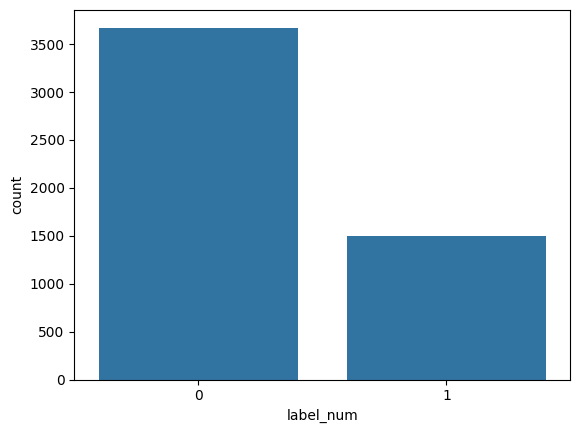

In [9]:
sns.countplot(x = 'label_num', data=df)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 0)

In [12]:
X_train.shape , y_train.shape

((4136, 15), (4136,))

In [13]:
X_test.shape, y_test.shape

((1035, 15), (1035,))

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()


In [16]:
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[674,  58],
       [ 21, 282]])

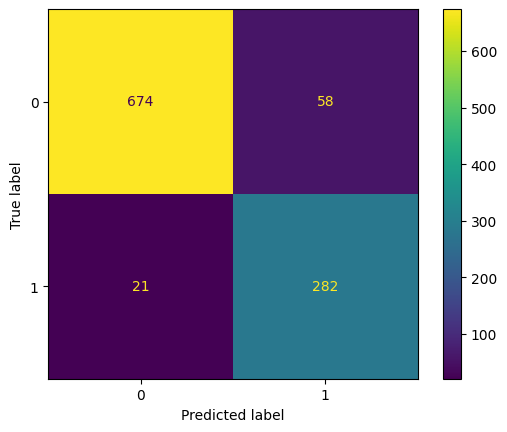

In [20]:
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

In [21]:
f1_score(y_test, y_pred)

np.float64(0.8771384136858476)

# OVERSAMPLING-UNDERSAMPLING:-

In [22]:
from imblearn.over_sampling import RandomOverSampler

In [23]:
oversampler = RandomOverSampler()

In [24]:
print('Before Sampling : ')
print(y_train.value_counts())

Before Sampling : 
label_num
0    2940
1    1196
Name: count, dtype: int64


In [26]:
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

In [27]:
X_train_oversampled.shape, y_train_oversampled.shape

((5880, 15), (5880,))

In [30]:
print('After oversampling :')
print(y_train_oversampled.value_counts())

After oversampling :
label_num
0    2940
1    2940
Name: count, dtype: int64


In [31]:
model2 = LogisticRegression()

In [32]:
model2.fit(X_train_oversampled, y_train_oversampled)

LogisticRegression()

In [33]:
train_predictions = model2.predict(X_train_oversampled)

In [34]:
test_predictions = model2.predict(X_test)

In [35]:
print(f"Training F1 Score : {f1_score(y_train_oversampled, train_predictions)}")

Training F1 Score : 0.9274116523400191


In [36]:
print(f"Test F1 Score: {f1_score(y_test, test_predictions)}")

Test F1 Score: 0.849507735583685


# SMOTE - Synthetically Minority Oversampling Technique:-

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
print('Before SMOTE:')
print(y_train.value_counts())

Before SMOTE:
label_num
0    2940
1    1196
Name: count, dtype: int64


In [39]:
smt = SMOTE()

In [40]:
X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [41]:
print('After SMOTE:')
print(y_sm.value_counts())

After SMOTE:
label_num
0    2940
1    2940
Name: count, dtype: int64


In [42]:
model3 = LogisticRegression(C=5, penalty='l1', solver = 'liblinear')

In [43]:
model3.fit(X_sm, y_sm)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [45]:
train_predictions_smote = model3.predict(X_sm)

In [46]:
test_predictions_smote = model3.predict(X_test)

In [47]:
print(f'Training F1 score: {f1_score(y_sm, train_predictions_smote)}')

Training F1 score: 0.9554266777133389


In [48]:
print(f'Test F1 score: {f1_score(y_test, test_predictions_smote)}')

Test F1 score: 0.9001536098310292


# MULTICLASS CLASSIFICATION:-

In [49]:
from sklearn.datasets import make_classification

In [50]:
X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)

In [51]:
X[:10]

array([[-1.06046348, -0.94615169],
       [-1.07328735,  1.12579697],
       [-1.30251507,  1.27609317],
       [-0.98202469, -0.01419437],
       [ 1.10608927, -0.57833699],
       [ 0.16874064, -1.23179638],
       [-1.10643431, -0.97368042],
       [ 0.04230583, -1.01173227],
       [-1.27793724, -0.82413896],
       [-0.96576308, -0.95889354]])

In [52]:
y[:10]

array([0, 2, 2, 2, 1, 1, 0, 1, 0, 0])

In [53]:
y = y.reshape(len(y), 1)
y[:10]

array([[0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [54]:
X.shape, y.shape

((498, 2), (498, 1))

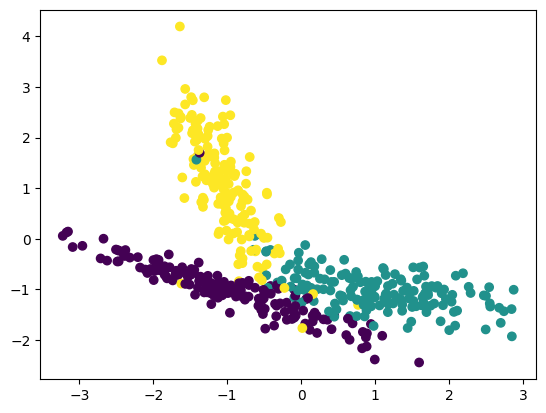

In [55]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [56]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=4)